<a href="https://colab.research.google.com/github/mcain368/Super_Store/blob/main/Super_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from datetime import datetime
print(f'Run time:{datetime.now().strftime("%D %T")}')

Run time:02/10/25 05:27:08


In [7]:
!git clone https://github.com/mcain368/Super_Store
%cd Super_Store

Cloning into 'Super_Store'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/Super_Store/Super_Store/Super_Store/Super_Store


In [8]:
!pip install pandas seaborn matplotlib plotly scikit-learn joblib

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
file_path = '/content/drive/My Drive/StockData/Superstore_Fixed.csv'
super = pd.read_csv(file_path, encoding='latin-1') # or 'ISO-8859-1', 'cp1252'


In [14]:
!mkdir -p reports/figures

# Plot and save
plt.figure(figsize=(10, 6))
sns.barplot(data=super, x='Category', y='Sales', estimator=sum)
plt.title('Sales by Category')
plt.savefig('reports/figures/sales_by_category.png', bbox_inches='tight')
plt.close()

In [17]:

!git config --global user.email "mmichaelcain@gmail.com"
!git config --global user.name "mcain368"

# Add changes, commit, and push
!git add .
!git commit -m "Added EDA visualizations"
!git push origin main

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [16]:
super.head()
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [17]:
super.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
Ship_Mode,0
Customer_ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [18]:
print(super[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


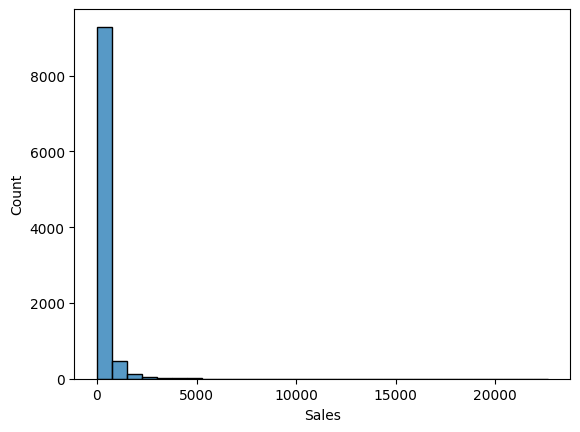

In [19]:
sns.histplot(super['Sales'], bins = 30)
plt.show()

In [22]:
super['order_date'] = pd.to_datetime(super['order_date'])
super['ship_date'] = pd.to_datetime(super['ship_date'])

In [41]:
super['order_year']= super['order_date'].dt.to_period('Y')
yearly_sales = super.groupby('order_year')['Sales'].sum().reset_index()


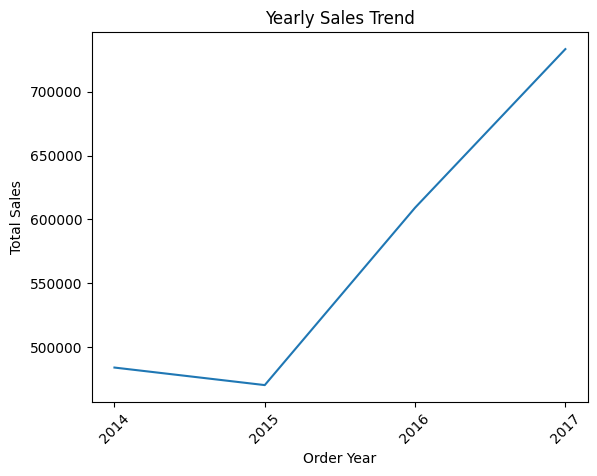

In [44]:
# Convert 'order_month' to string before plotting
yearly_sales['order_year'] = yearly_sales['order_year'].astype(str)

sns.lineplot(x='order_year', y='Sales', data=yearly_sales)
plt.xticks(rotation=45)
plt.xlabel('Order Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
X = super[['Sales', 'Quantity', 'Discount', 'Postal_Code']]
y = super['Profit']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor()
model = model.fit(X_train, y_train)

In [53]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RSME: {rsme}")
print(f"R2: {r2}")

RSME: 237.46943113473776
R2: -0.16307279470867186


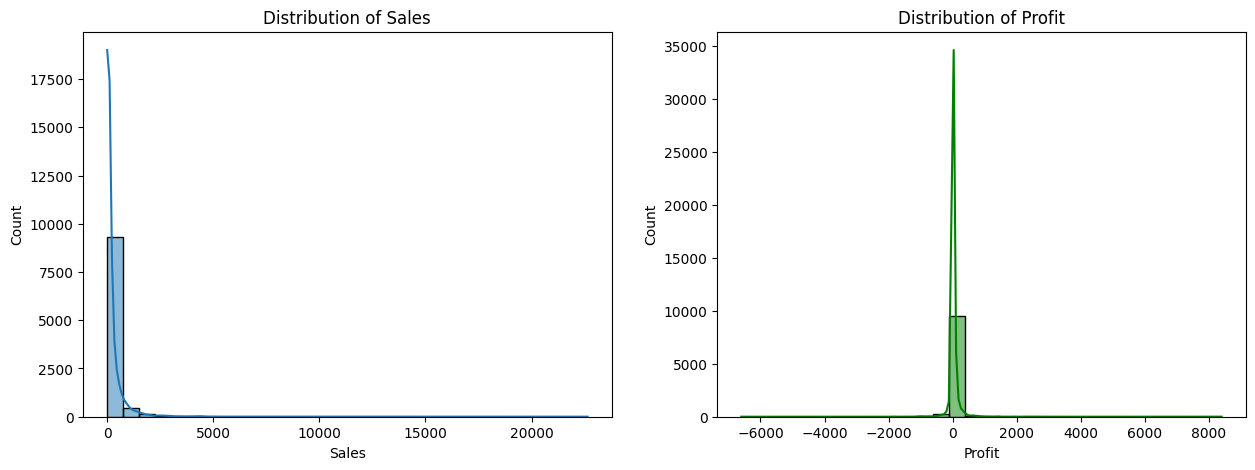

In [55]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Sales distribution
sns.histplot(super['Sales'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Sales')

#Profit distribution
sns.histplot(super['Profit'], bins=30, kde=True, color='green', ax=ax[1])
ax[1].set_title('Distribution of Profit')

plt.show()

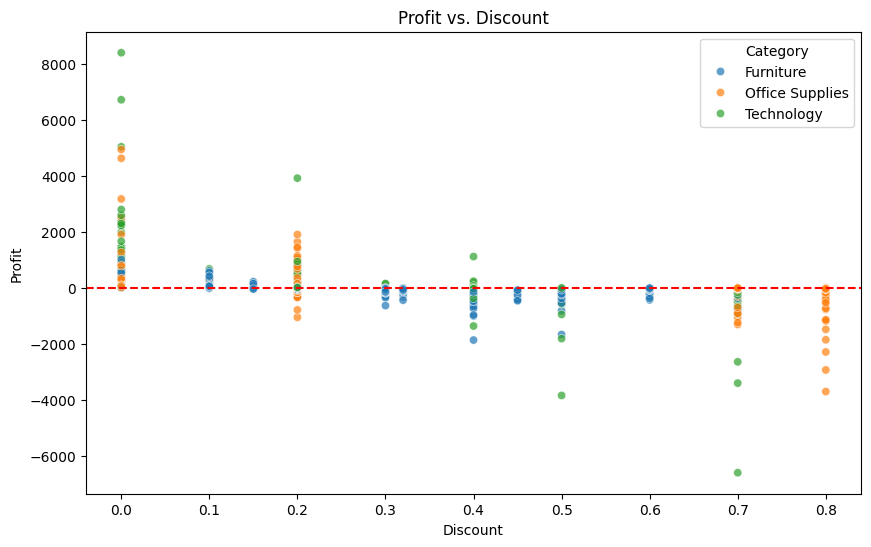

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=super, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Profit vs. Discount')
plt.axhline(0, color='red', linestyle='--')
plt.show()

<ipython-input-57-fc96fcf534cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='Product_Name', x='Sales', palette='viridis')


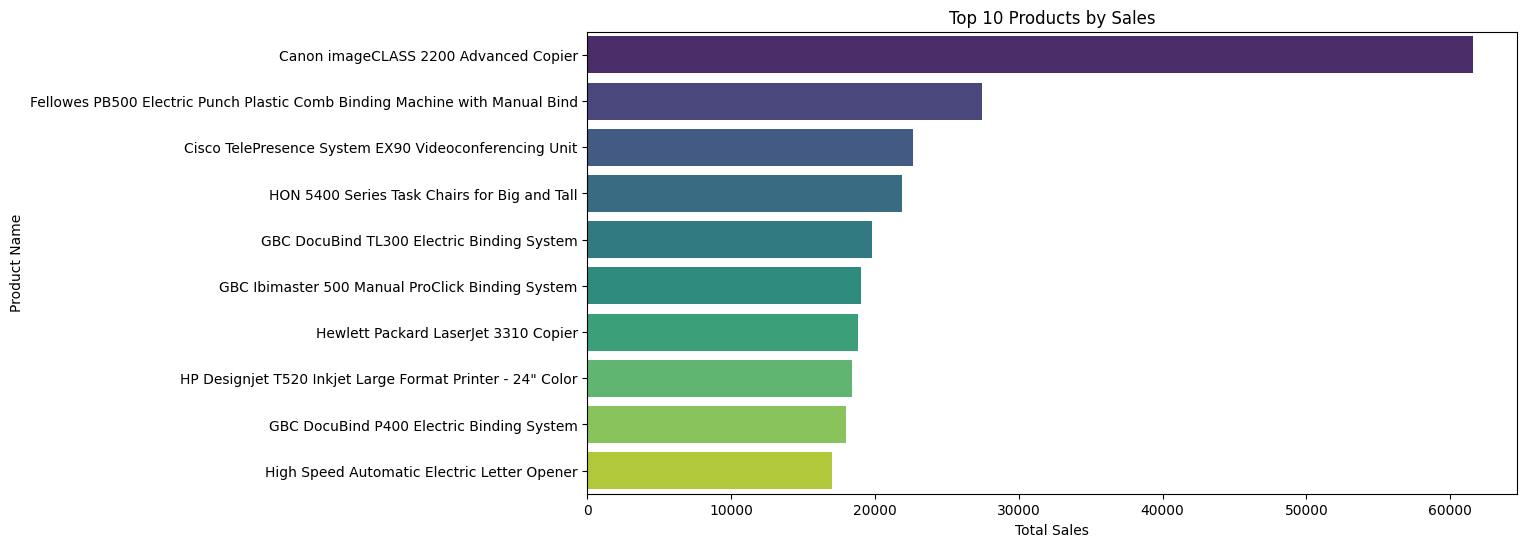

In [57]:
# grouping the sales by product
top_products = super.groupby('Product_Name')['Sales'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, y='Product_Name', x='Sales', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

<ipython-input-58-729d2242288d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=super, x='Category', y='Sales', estimator=sum, ci=None)


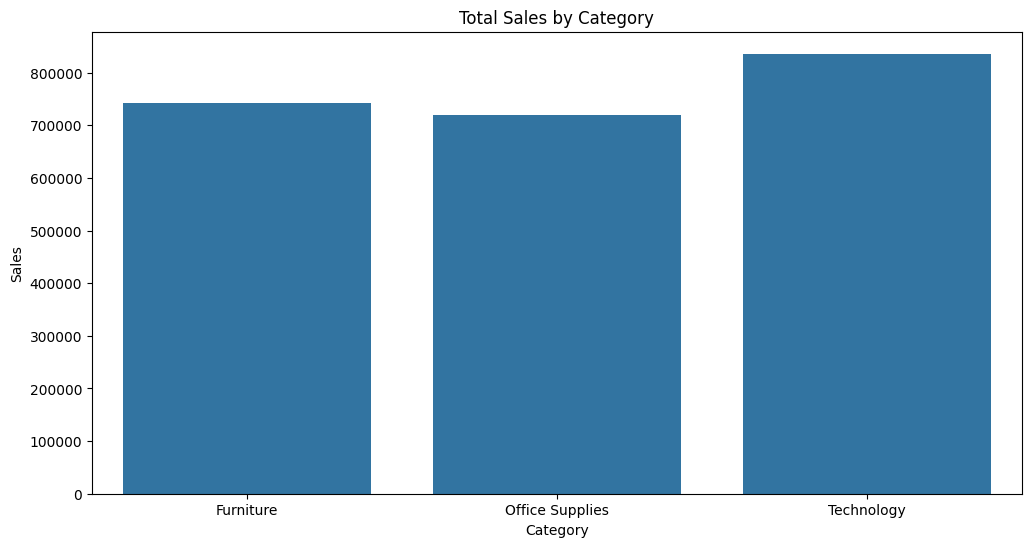

<ipython-input-58-729d2242288d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=super, x='Sub_Category', y='Profit', estimator=sum, ci=None)


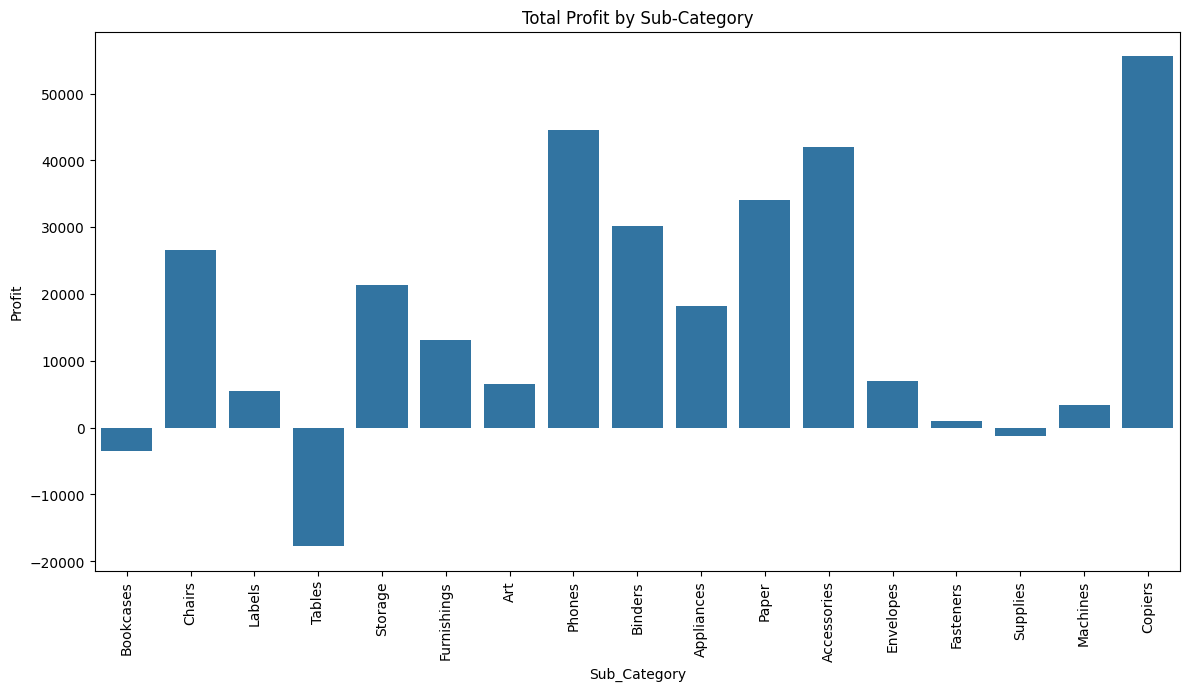

In [58]:
# Sales by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=super, x='Category', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.show()

# Profit by Sub-Category
plt.figure(figsize=(14, 7))
sns.barplot(data=super, x='Sub_Category', y='Profit', estimator=sum, ci=None)
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=90)
plt.show()

<ipython-input-59-4791fe1c3dea>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=super, x='Ship_Mode', y='Sales', estimator=sum, ci=None, ax=ax[0])
<ipython-input-59-4791fe1c3dea>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=super, x='Ship_Mode', y='Profit', estimator=sum, ci=None, ax=ax[1])


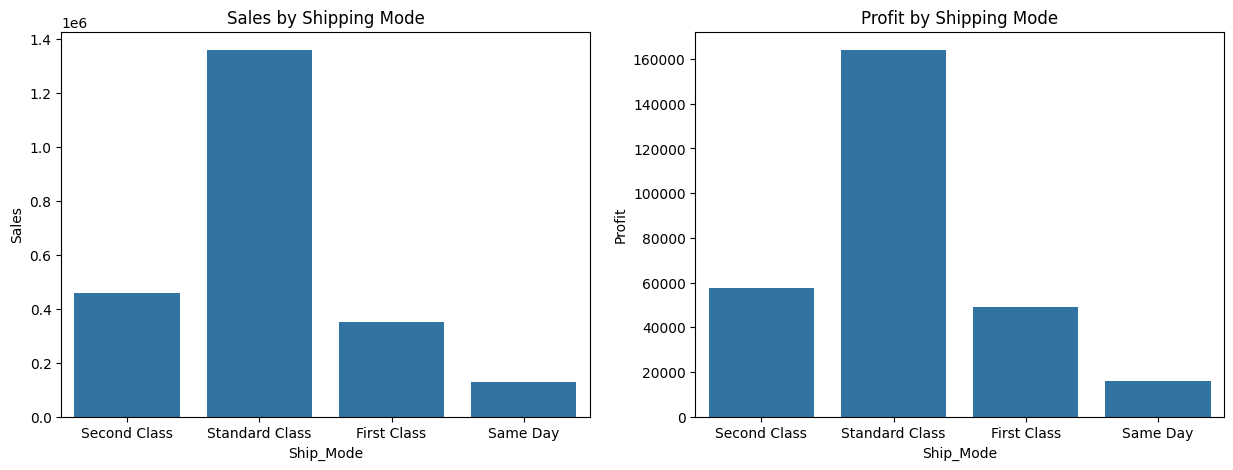

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Sales by Ship Mode
sns.barplot(data=super, x='Ship_Mode', y='Sales', estimator=sum, ci=None, ax=ax[0])
ax[0].set_title('Sales by Shipping Mode')

# Profit by Ship Mode
sns.barplot(data=super, x='Ship_Mode', y='Profit', estimator=sum, ci=None, ax=ax[1])
ax[1].set_title('Profit by Shipping Mode')

plt.show()

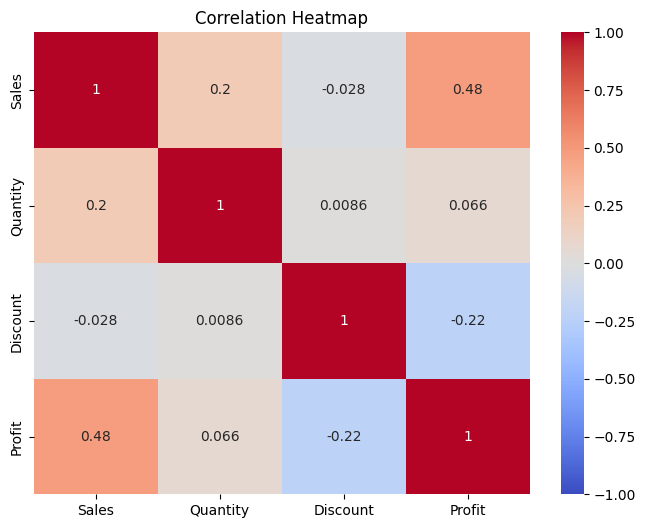

In [61]:
# Select numerical columns
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = super[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-62-56db2a41ccf3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=super, x='Region', y='Sales', estimator=sum, ci=None)


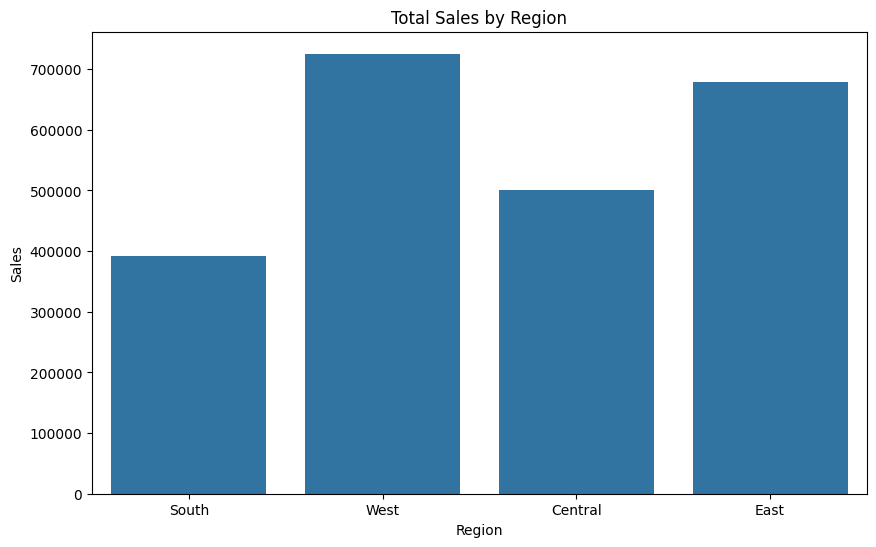

<ipython-input-62-56db2a41ccf3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Sales', y='State', palette='rocket')


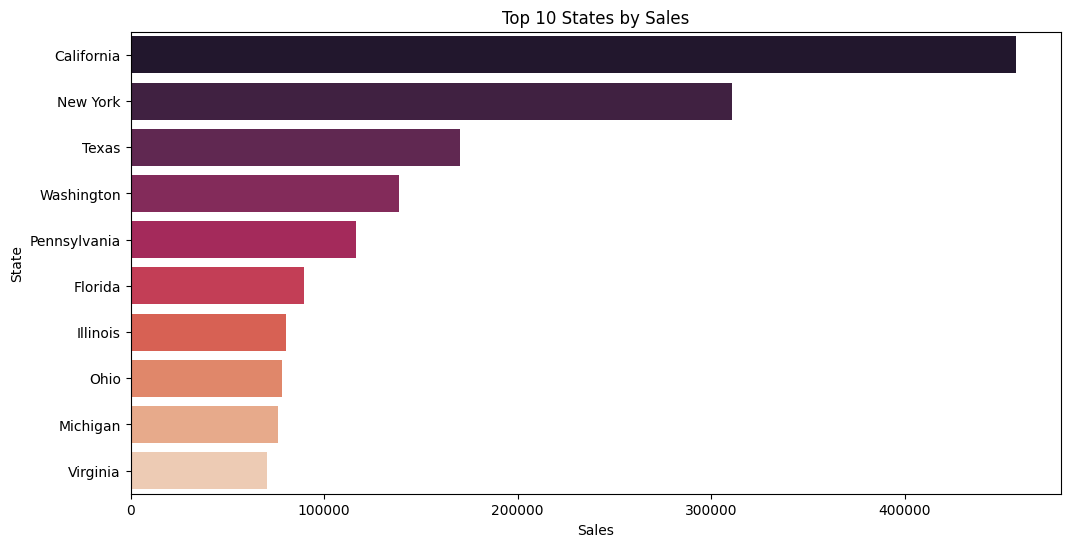

In [62]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=super, x='Region', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales by Region')
plt.show()

# (Top 10)
top_states = super.groupby('State')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='Sales', y='State', palette='rocket')
plt.title('Top 10 States by Sales')
plt.show()

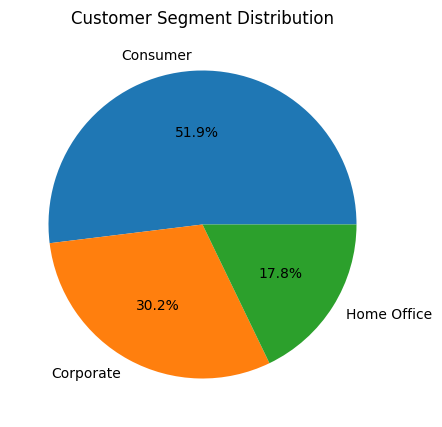

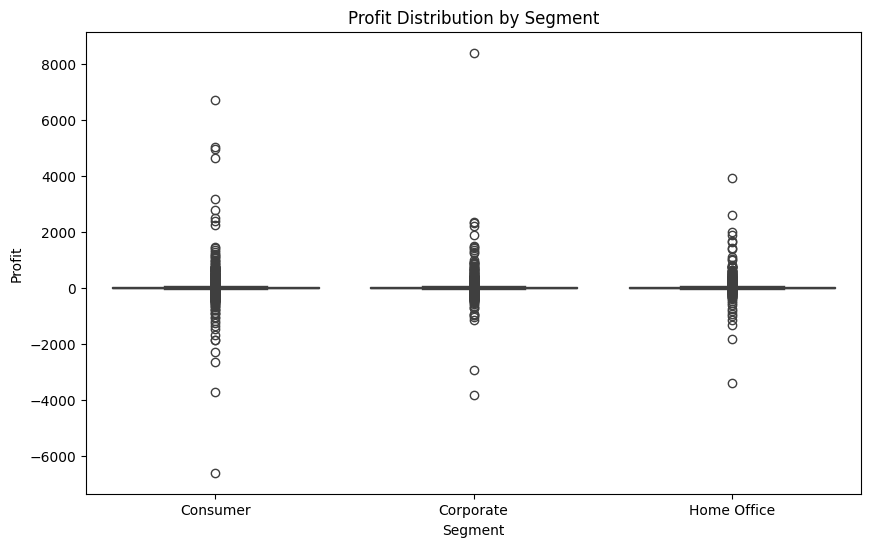

In [63]:
# Segment distribution
plt.figure(figsize=(8, 5))
super['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segment Distribution')
plt.ylabel('')
plt.show()

# Segment vs. Profit
plt.figure(figsize=(10, 6))
sns.boxplot(data=super, x='Segment', y='Profit')
plt.title('Profit Distribution by Segment')
plt.show()

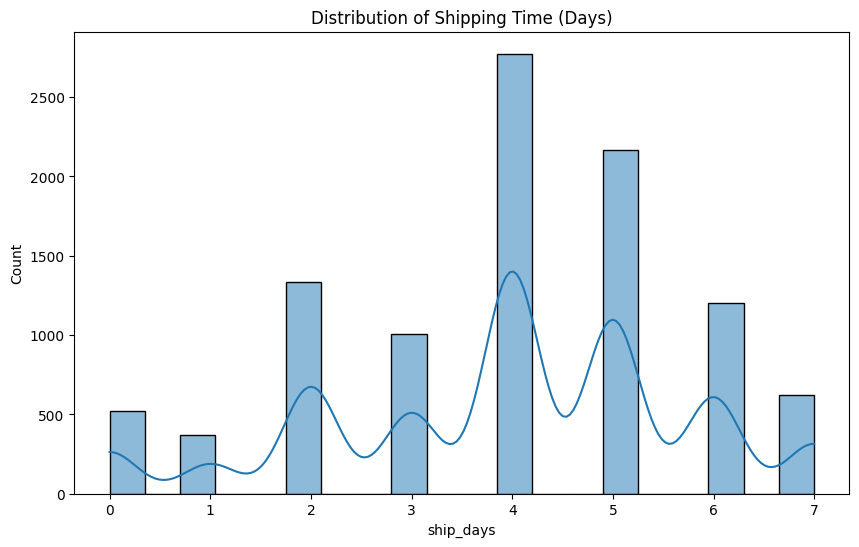

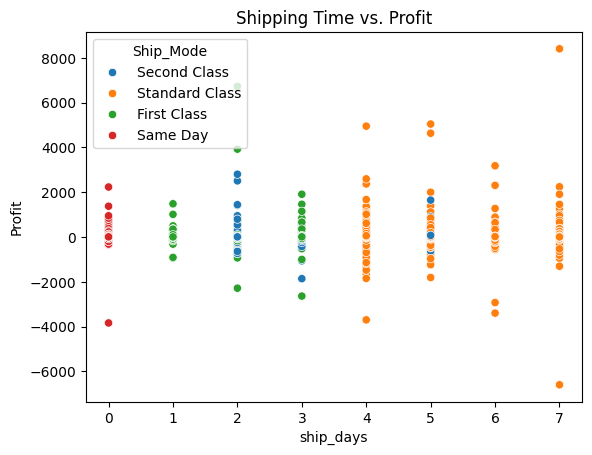

In [64]:
# Calculating shipping days
super['ship_days'] = (super['ship_date'] - super['order_date']).dt.days

# shipping days distribution
plt.figure(figsize=(10, 6))
sns.histplot(super['ship_days'], bins=20, kde=True)
plt.title('Distribution of Shipping Time (Days)')
plt.show()

# Shipping days vs. Profit
sns.scatterplot(data=super, x='ship_days', y='Profit', hue='Ship_Mode')
plt.title('Shipping Time vs. Profit')
plt.show()